### Monthly totals of international airline passengers, 1949 to 1960. Represented in 1000s. 

# Moving average forecast

In [27]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
import os
os.chdir('C:/Users/user/Desktop/TimeSeries/TS_Ann/Day 1/data')

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('AirPax.csv', parse_dates=[['Year', 'Month']], index_col=0)
print(df.head())

            Pax
Year_Month     
1949-01-01  112
1949-02-01  118
1949-03-01  132
1949-04-01  129
1949-05-01  121


In [32]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

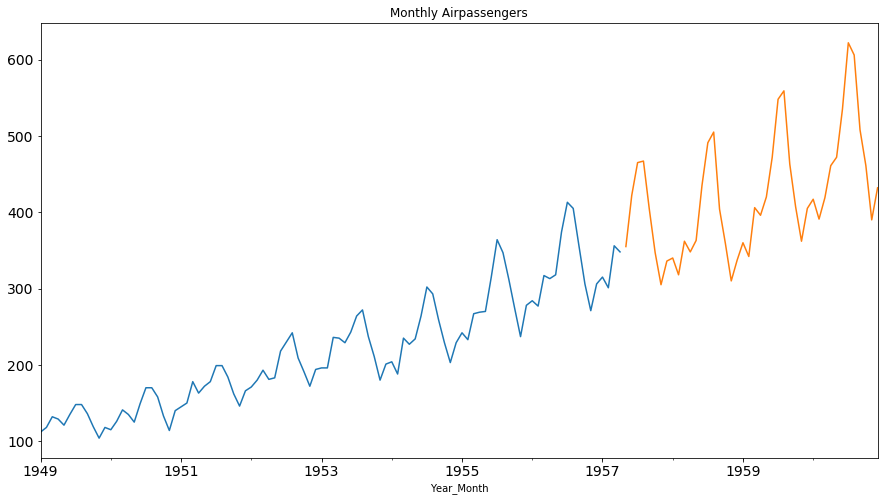

In [34]:
#Plot data
train.Pax.plot(figsize=(15,8), title= 'Monthly Airpassengers', fontsize=14)
test.Pax.plot(figsize=(15,8), title= 'Monthly Airpassengers', fontsize=14)

# Method1: Regression on Time

In [36]:
time = [i+1 for i in range(len(df))]
#time

In [37]:
df1 = df.copy()
df1['time'] = time

In [38]:
df1.head()

,Pax,time
Year_Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5


In [39]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [40]:
x_train = train.drop('Pax', axis=1)
x_test = test.drop('Pax', axis=1)
y_train = train[['Pax']]
y_test = test[['Pax']]

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
predictions = model.predict(x_test)

In [45]:
y_test['RegOnTime'] = predictions

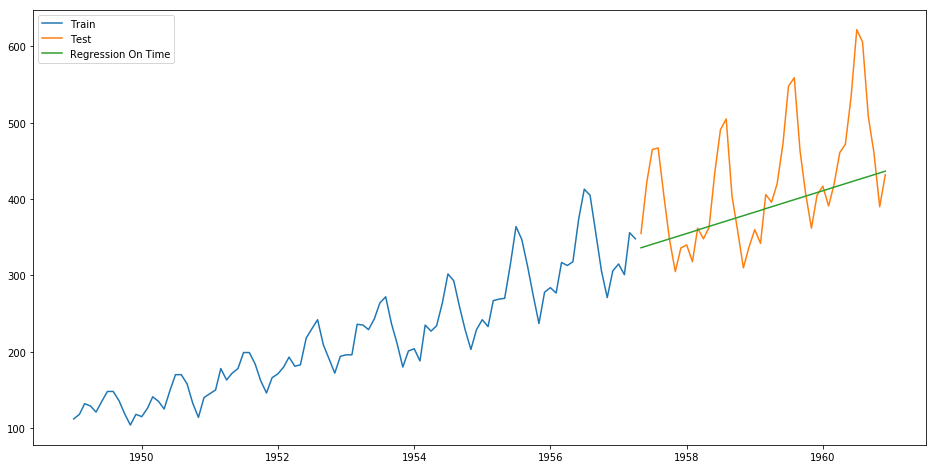

In [46]:
plt.figure(figsize=(16,8))
plt.plot( train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [47]:
rmse = sqrt(mean_squared_error(test.Pax, y_test.RegOnTime))
rmse = round(rmse, 3)
rmse

75.678

In [48]:
abs_error = np.abs(y_test['Pax']-y_test['RegOnTime'])
actual = y_test['Pax']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.119

In [49]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,75.678,0.119


# Method2: Regression on Time With Seasonal Components

In [50]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time

In [51]:
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [52]:
df1['monthSeasonality'] = monthSeasonality*12
df1.head(12)

,Pax,time,monthSeasonality
Year_Month,,,
1949-01-01,112,1,m1
1949-02-01,118,2,m2
1949-03-01,132,3,m3
1949-04-01,129,4,m4
1949-05-01,121,5,m5
1949-06-01,135,6,m6
1949-07-01,148,7,m7
1949-08-01,148,8,m8
1949-09-01,136,9,m9


In [53]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(4).T

Year_Month,1949-01-01 00:00:00,1949-02-01 00:00:00,1949-03-01 00:00:00,1949-04-01 00:00:00
Pax,112,118,132,129
time,1,2,3,4
monthSeasonality_m10,0,0,0,0
monthSeasonality_m11,0,0,0,0
monthSeasonality_m12,0,0,0,0
monthSeasonality_m2,0,1,0,0
monthSeasonality_m3,0,0,1,0
monthSeasonality_m4,0,0,0,1
monthSeasonality_m5,0,0,0,0
monthSeasonality_m6,0,0,0,0


In [54]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [61]:
x_train = train.drop('Pax', axis=1)
x_test = test.drop('Pax', axis=1)
y_train = train[['Pax']]
y_test = test[['Pax']]

In [62]:
model = LinearRegression()

In [63]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
predictions = model.predict(x_test)

In [65]:
y_test['RegOnTimeSeasonal'] = predictions

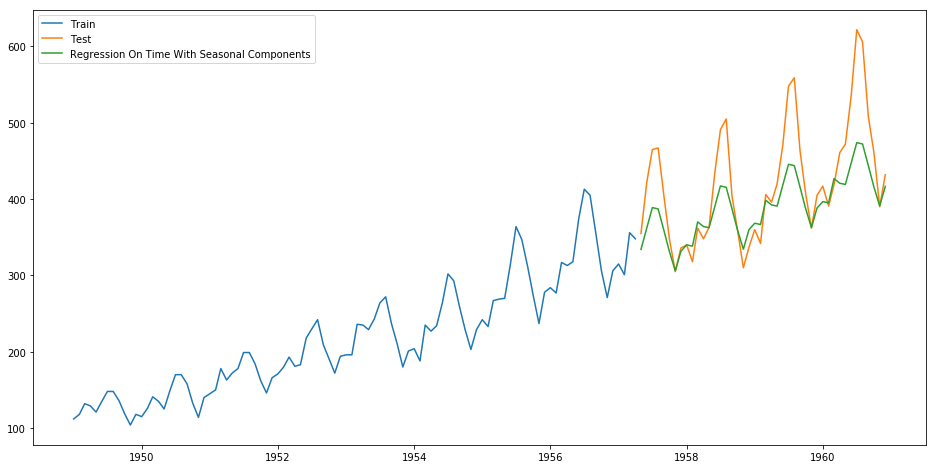

In [66]:
plt.figure(figsize=(16,8))
plt.plot( train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [67]:
rmse = sqrt(mean_squared_error(test.Pax, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
rmse

53.493

In [68]:
abs_error = np.abs(y_test['Pax']-y_test['RegOnTimeSeasonal'])
actual = y_test['Pax']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0799

In [69]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,75.678,0.1190
0,RegressionOnTimeSeasonal,53.493,0.0799


# Method 3: Naive Approach:  \hat{y}_t+1 = y_t

In [70]:
dd= np.asarray(train.Pax)

In [71]:
dd

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348], dtype=int64)

In [72]:
y_hat = test.copy()

In [73]:
#y_hat['naive'] = dd[len(dd)-1]

for i in range(len(y_hat)):
    if i == 0:
        y_hat['naive'] = np.nan
    else:
        y_hat['naive'][i] = y_hat.Pax[i-1]


Text(0.5, 1.0, 'Naive Forecast')

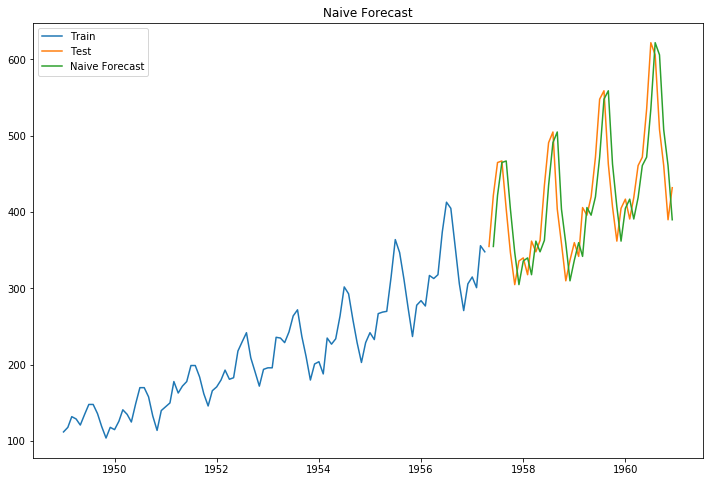

In [74]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Pax'], label='Train')
plt.plot(test.index,test['Pax'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [76]:
#RMSE Calculation
rmse = np.sqrt(mean_squared_error(test.Pax[1:len(test.Pax)], y_hat.naive[1:len(test.Pax)]))
rmse = round(rmse, 3)
rmse


49.969

In [77]:
abs_error = np.abs(y_test['Pax']-y_hat.naive)
actual = y_test['Pax']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.1011

In [78]:
tempResultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,75.678,0.1190
0,RegressionOnTimeSeasonal,53.493,0.0799
0,Naive forecast,49.969,0.1011


RMSE show best Naive bayes

# Method 4: Simple Average

In [79]:
y_hat_avg = test.copy()

In [80]:
y_hat_avg['avg_forecast'] = train['Pax'].mean()

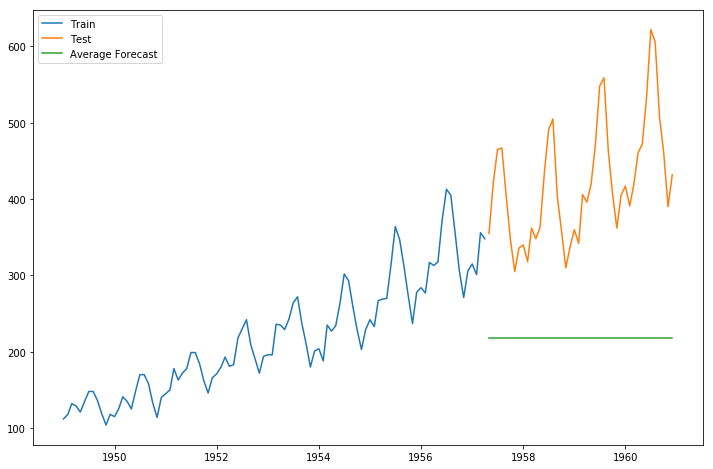

In [81]:
plt.figure(figsize=(12,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [82]:
rmse = sqrt(mean_squared_error(test.Pax, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
rmse

216.644

In [83]:
abs_error = np.abs(y_test['Pax']-y_hat_avg.avg_forecast)
actual = y_test['Pax']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4652

In [84]:
tempResultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,75.678,0.1190
0,RegressionOnTimeSeasonal,53.493,0.0799
0,Naive forecast,49.969,0.1011
0,Simple average forecast,216.644,0.4652


We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.

# Method5: Moving Average(MA)

In [85]:
df1 = df.copy()

In [86]:
df1['moving_avg_forecast'] = df['Pax'].rolling(60).mean()

In [87]:
df1.head(2)

,Pax,moving_avg_forecast
Year_Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN


In [88]:
df1.tail(2)

,Pax,moving_avg_forecast
Year_Month,,
1960-11-01,390,393.866667
1960-12-01,432,396.433333


In [89]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [90]:
y_hat_avg = test.copy()

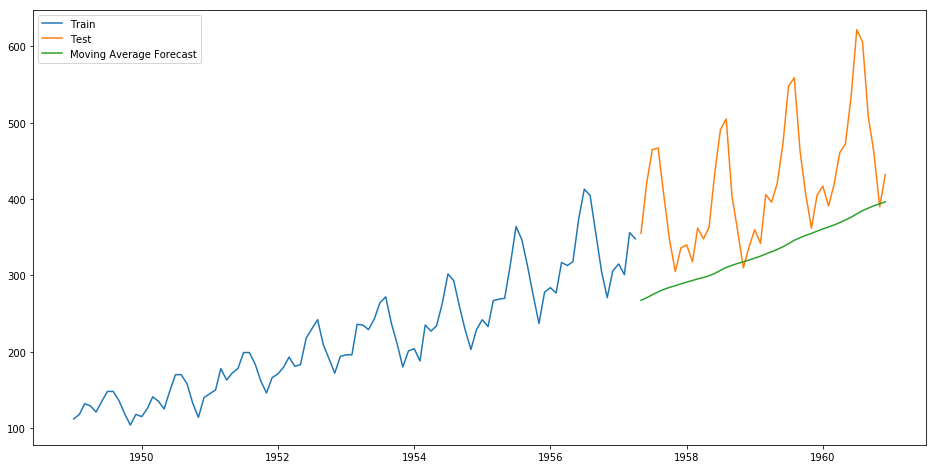

In [91]:
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [92]:
rmse = sqrt(mean_squared_error(test.Pax, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

112.696

In [93]:
abs_error = np.abs(y_test['Pax']-y_hat_avg.moving_avg_forecast)
actual = y_test['Pax']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2012

In [94]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,75.678,0.1190
0,RegressionOnTimeSeasonal,53.493,0.0799
0,Naive forecast,49.969,0.1011
0,Simple average forecast,216.644,0.4652
0,Moving average forecast,112.696,0.2012
